In [1]:

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import explained_variance_score


import warnings
warnings.filterwarnings('ignore')

Column Name	Description	Type
Fiscal Year - Fiscal Year

Payroll Number- Payroll Number

Agency Name - The Payroll agency that the employee works for

Last Name - Last name of employee

First Name - First name of employee

Mid Init - Middle initial of employee

Agency Start Date - Date which employee began working for their current agency

Work Location Borough - Borough of employee's primary work location

Title Description - Civil service title description of the employee

Leave Status as of June 30 - Status of employee as of the close of the relevant fiscal year: Active, Ceased, or On Leave



Base Salary	- Base Salary assigned to the employee

Pay Basis - Lists whether the employee is paid on an hourly, per diem or annual basis

Regular Hours - Number of regular hours employee worked in the fiscal year

Regular Gross Paid - The amount paid to the employee for base salary during the fiscal year

OT Hours - Overtime Hours worked by employee in the fiscal year

Total OT Paid - Total overtime pay paid to the employee in the fiscal year

Total Other Pay	- Includes any compensation in addition to gross salary and overtime pay, ie Differentials, lump sums, uniform allowance, meal allowance, retroactive pay increases, settlement amounts, and bonus pay, if applicable.


In [2]:
# Bringing the data into code and examining the shape 
nyc_df = pd.read_csv('nyc_salary.csv')

nyc_df.shape

(4496767, 17)

In [3]:
# Examining the info of nyc salaries
nyc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4496767 entries, 0 to 4496766
Data columns (total 17 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Fiscal Year                 int64  
 1   Payroll Number              float64
 2   Agency Name                 object 
 3   Last Name                   object 
 4   First Name                  object 
 5   Mid Init                    object 
 6   Agency Start Date           object 
 7   Work Location Borough       object 
 8   Title Description           object 
 9   Leave Status as of June 30  object 
 10  Base Salary                 float64
 11  Pay Basis                   object 
 12  Regular Hours               float64
 13  Regular Gross Paid          float64
 14  OT Hours                    float64
 15  Total OT Paid               float64
 16  Total Other Pay             float64
dtypes: float64(7), int64(1), object(9)
memory usage: 583.2+ MB


In [4]:
# examining the columns to see how I want to explore the data
nyc_df.head(-5)

,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
0,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,BEREZIN,MIKHAIL,NaN,08/10/2015,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.00,per Annum,1820.0,84698.21,0.0,0.0,0.00
1,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,GEAGER,VERONICA,M,09/12/2016,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.00,per Annum,1820.0,84698.21,0.0,0.0,0.00
2,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,RAMANI,SHRADDHA,NaN,02/22/2016,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.00,per Annum,1820.0,84698.21,0.0,0.0,0.00
3,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,ROTTA,JONATHAN,D,09/16/2013,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.00,per Annum,1820.0,84698.21,0.0,0.0,0.00
4,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,WILSON II,ROBERT,P,04/30/2018,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.00,per Annum,1820.0,84698.21,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4496757,2021,742.0,DEPT OF ED PEDAGOGICAL,IN,PARIMA,NaN,09/06/2016,MANHATTAN,TEACHER-REG SUB,CEASED,124909.00,per Annum,0.0,-51156.68,0.0,0.0,-16.93
4496758,2021,745.0,DEPT OF ED HRLY SUPPORT STAFF,FRATIANNI,MARYANN,C,04/27/1999,MANHATTAN,F/T SCHOOL AIDE,CEASED,17.00,per Hour,0.0,-57256.00,0.0,0.0,5814.70
4496759,2021,742.0,DEPT OF ED PEDAGOGICAL,LAMBERT,MARISA,M,09/06/2005,MANHATTAN,ASSISTANT PRINCIPAL,ON LEAVE,130351.00,per Annum,0.0,-36364.44,0.0,0.0,-15369.52
4496760,2021,745.0,DEPT OF ED HRLY SUPPORT STAFF,RIVERA,SARAH,M,09/02/1997,MANHATTAN,F/T SCHOOL AIDE,CEASED,17.04,per Hour,0.0,-58284.17,0.0,0.0,4347.24


In [5]:
nyc_df['Pay Basis'].value_counts()

per Annum          2684554
per Day            1002261
per Hour            789496
Prorated Annual      20456
Name: Pay Basis, dtype: int64

In [6]:
nyc_df.isnull().sum()

Fiscal Year                         0
Payroll Number                1745440
Agency Name                         0
Last Name                        6632
First Name                       6661
Mid Init                      1835833
Agency Start Date                  63
Work Location Borough          506229
Title Description                  88
Leave Status as of June 30          0
Base Salary                         0
Pay Basis                           0
Regular Hours                       0
Regular Gross Paid                  0
OT Hours                            0
Total OT Paid                       0
Total Other Pay                     0
dtype: int64

I will drop middle initial, payroll number, first and last names from the dataset becuase I do not believe these factors influence how much as employee is paid

In [7]:
#Dropped Payroll Number and Middle initial so far becuase I do not see them affected EDA

nyc_df.drop(columns=['Payroll Number', 'Mid Init', 'First Name', 'Last Name'], inplace=True)
nyc_df.head()

,Fiscal Year,Agency Name,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
0,2020,OFFICE OF EMERGENCY MANAGEMENT,08/10/2015,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0
1,2020,OFFICE OF EMERGENCY MANAGEMENT,09/12/2016,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0
2,2020,OFFICE OF EMERGENCY MANAGEMENT,02/22/2016,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0
3,2020,OFFICE OF EMERGENCY MANAGEMENT,09/16/2013,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0
4,2020,OFFICE OF EMERGENCY MANAGEMENT,04/30/2018,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0


In [8]:
nyc_df.isnull().sum()

Fiscal Year                        0
Agency Name                        0
Agency Start Date                 63
Work Location Borough         506229
Title Description                 88
Leave Status as of June 30         0
Base Salary                        0
Pay Basis                          0
Regular Hours                      0
Regular Gross Paid                 0
OT Hours                           0
Total OT Paid                      0
Total Other Pay                    0
dtype: int64

In [9]:
nyc_df.nunique()

Fiscal Year                         8
Agency Name                       165
Agency Start Date               15272
Work Location Borough              22
Title Description                1822
Leave Status as of June 30          5
Base Salary                    100582
Pay Basis                           4
Regular Hours                   89307
Regular Gross Paid            1918388
OT Hours                        56445
Total OT Paid                  891348
Total Other Pay                998947
dtype: int64

In [10]:
nyc_df.shape

(4496767, 13)

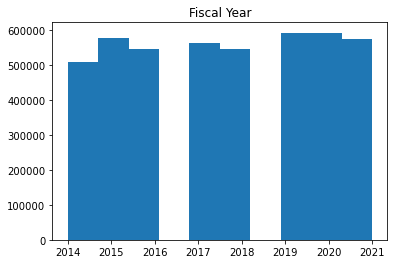

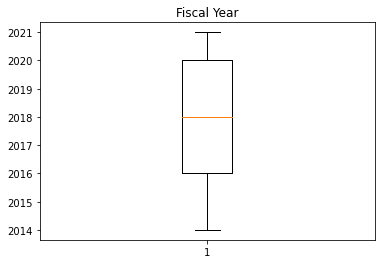

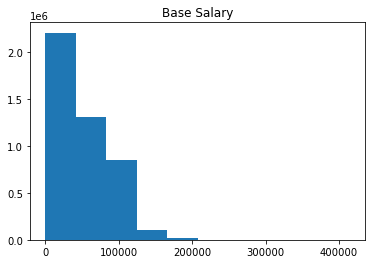

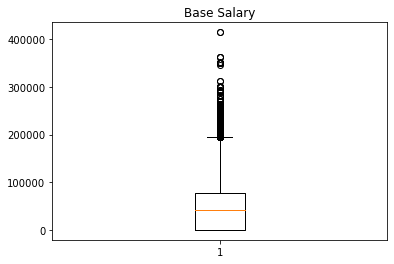

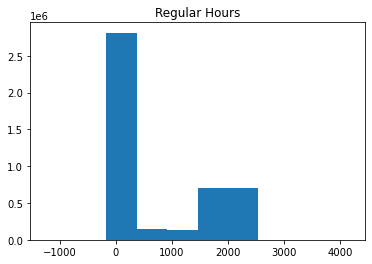

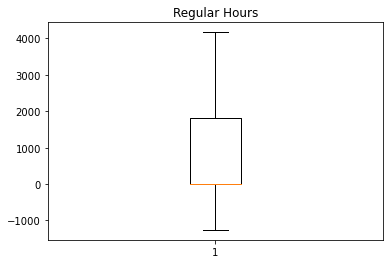

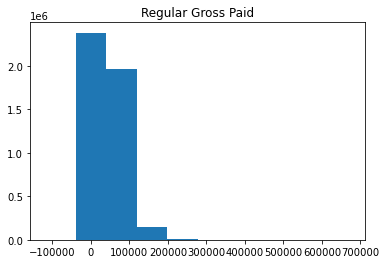

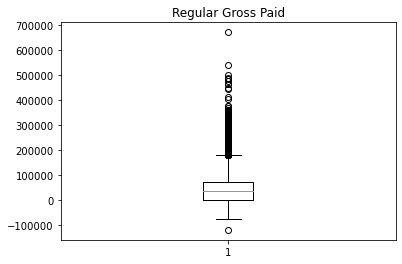

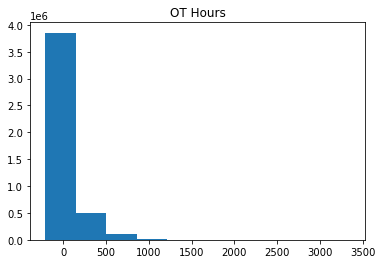

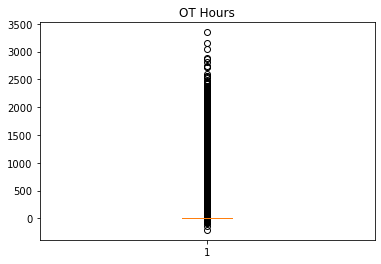

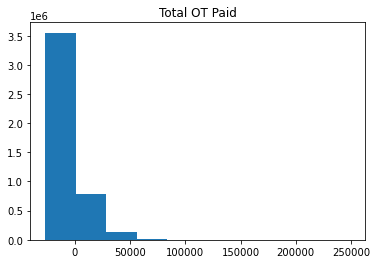

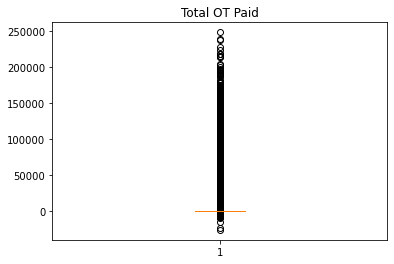

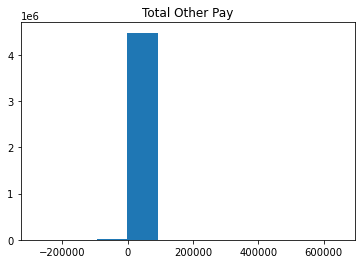

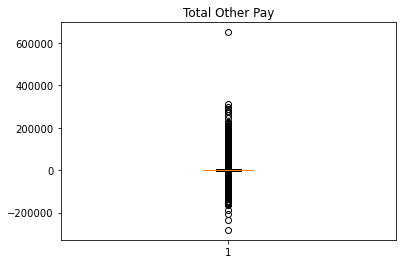

In [11]:
num_cols = nyc_df.columns[[(nyc_df[col].dtype == 'int64') or (nyc_df[col].dtype == 'float64') for col in nyc_df.columns]]
for col in num_cols:
    plt.hist(nyc_df[col])
    plt.title(col)
    plt.show()
    plt.boxplot(nyc_df[col])
    plt.title(col)
    plt.show()

## Checking for negative values

I noticed a lot of negative values that are throwing off the graphs. Looking at

In [12]:
# checking for negative values

(nyc_df['Total Other Pay'] < 0).sum().sum()

# total other pay with negative value is 45,973

45973

In [13]:
## Check in how many negative OT pay there is

(nyc_df['Total OT Paid'] < 0).sum().sum()

## That sum is 1700


1700

In [14]:
(nyc_df['Regular Gross Paid'] <= 0).sum().sum()

144656

In [15]:
(nyc_df['Regular Hours'] <= 0).value_counts()

True     2575222
False    1921545
Name: Regular Hours, dtype: int64

In [16]:
(nyc_df['Work Location Borough']).nunique()

22

In [17]:
(nyc_df['Pay Basis'] == 'per Hour').value_counts()

False    3707271
True      789496
Name: Pay Basis, dtype: int64

In [18]:
nyc_df['Leave Status as of June 30'].value_counts()

ACTIVE                 3828710
CEASED                  574695
ON LEAVE                 48368
SEASONAL                 37345
ON SEPARATION LEAVE       7649
Name: Leave Status as of June 30, dtype: int64

In [19]:
nyc_df[nyc_df['Regular Gross Paid'] <= 0]

,Fiscal Year,Agency Name,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
85,2020,OFFICE OF EMERGENCY MANAGEMENT,08/01/2011,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,CEASED,90737.0,per Annum,0.0,0.00,0.0,0.0,39464.19
88,2020,OFFICE OF EMERGENCY MANAGEMENT,08/13/2007,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,CEASED,151131.0,per Annum,0.0,0.00,0.0,0.0,31010.35
103,2020,OFFICE OF EMERGENCY MANAGEMENT,10/28/2012,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,CEASED,136887.0,per Annum,0.0,0.00,0.0,0.0,14860.74
113,2020,OFFICE OF EMERGENCY MANAGEMENT,11/13/2017,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,CEASED,81350.0,per Annum,0.0,0.00,0.0,0.0,7422.85
114,2020,OFFICE OF EMERGENCY MANAGEMENT,03/19/2018,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,CEASED,83500.0,per Annum,0.0,0.00,0.0,0.0,6658.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4496762,2021,DEPT OF ED PEDAGOGICAL,10/01/1986,OTHER,ASSISTANT PRINCIPAL,CEASED,124800.0,per Annum,0.0,0.00,0.0,0.0,-71916.37
4496763,2021,BRONX DISTRICT ATTORNEY,07/02/1990,BRONX,SPECIAL ASSISTANT TO THE DISTRICT ATTORNEY,CEASED,110000.0,per Annum,-70.0,-4207.65,0.0,0.0,-75440.00
4496764,2021,DEPT OF ED PEDAGOGICAL,10/15/1985,OTHER,ASSISTANT PRINCIPAL,CEASED,126061.0,per Annum,0.0,0.00,0.0,0.0,-87436.13
4496765,2021,DEPT OF ED PEDAGOGICAL,11/04/1977,OTHER,PRINCIPAL,CEASED,159609.0,per Annum,0.0,0.00,0.0,0.0,-97608.11


After noticing the negative values. I saw that they may be linked to leave status. Looking at the data dictionary, leave status is whether an individual is currently employed, ceased or no longer employed with the city(they cease to work there anymore). Instead of dropping the values less than or equal to 0, I will replace them with their base salary

In [20]:
nyc_df['Regular Gross Paid'] = np.where((nyc_df['Leave Status as of June 30'] == 'CEASED') | (nyc_df['Leave Status as of June 30'] == 'ON LEAVE'), nyc_df['Base Salary'], nyc_df['Regular Gross Paid'])

nyc_df.head(-5)

,Fiscal Year,Agency Name,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
0,2020,OFFICE OF EMERGENCY MANAGEMENT,08/10/2015,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.00,per Annum,1820.0,84698.21,0.0,0.0,0.00
1,2020,OFFICE OF EMERGENCY MANAGEMENT,09/12/2016,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.00,per Annum,1820.0,84698.21,0.0,0.0,0.00
2,2020,OFFICE OF EMERGENCY MANAGEMENT,02/22/2016,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.00,per Annum,1820.0,84698.21,0.0,0.0,0.00
3,2020,OFFICE OF EMERGENCY MANAGEMENT,09/16/2013,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.00,per Annum,1820.0,84698.21,0.0,0.0,0.00
4,2020,OFFICE OF EMERGENCY MANAGEMENT,04/30/2018,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.00,per Annum,1820.0,84698.21,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4496757,2021,DEPT OF ED PEDAGOGICAL,09/06/2016,MANHATTAN,TEACHER-REG SUB,CEASED,124909.00,per Annum,0.0,124909.00,0.0,0.0,-16.93
4496758,2021,DEPT OF ED HRLY SUPPORT STAFF,04/27/1999,MANHATTAN,F/T SCHOOL AIDE,CEASED,17.00,per Hour,0.0,17.00,0.0,0.0,5814.70
4496759,2021,DEPT OF ED PEDAGOGICAL,09/06/2005,MANHATTAN,ASSISTANT PRINCIPAL,ON LEAVE,130351.00,per Annum,0.0,130351.00,0.0,0.0,-15369.52
4496760,2021,DEPT OF ED HRLY SUPPORT STAFF,09/02/1997,MANHATTAN,F/T SCHOOL AIDE,CEASED,17.04,per Hour,0.0,17.04,0.0,0.0,4347.24


In [21]:
nyc_df = nyc_df[nyc_df['Total Other Pay'] >= 0]

nyc_df.head(-5)

,Fiscal Year,Agency Name,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
0,2020,OFFICE OF EMERGENCY MANAGEMENT,08/10/2015,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.00
1,2020,OFFICE OF EMERGENCY MANAGEMENT,09/12/2016,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.00
2,2020,OFFICE OF EMERGENCY MANAGEMENT,02/22/2016,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.00
3,2020,OFFICE OF EMERGENCY MANAGEMENT,09/16/2013,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.00
4,2020,OFFICE OF EMERGENCY MANAGEMENT,04/30/2018,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4496726,2021,DEPT OF ED PEDAGOGICAL,09/03/2013,MANHATTAN,TEACHER SPECIAL EDUCATION,ON LEAVE,85258.0,per Annum,0.0,85258.00,0.0,0.0,1867.86
4496727,2021,DEPT OF ED PARA PROFESSIONALS,03/18/2008,MANHATTAN,ANNUAL ED PARA,CEASED,44975.0,per Annum,0.0,44975.00,0.0,0.0,2504.00
4496733,2021,DEPT OF ED PEDAGOGICAL,09/18/1985,MANHATTAN,TEACHER,CEASED,124909.0,per Annum,0.0,124909.00,0.0,0.0,2854.22
4496736,2021,DEPT OF ED PEDAGOGICAL,09/04/2012,MANHATTAN,SCHOOL PSYCHOLGIST,CEASED,97720.0,per Annum,0.0,97720.00,0.0,0.0,15588.30


In [22]:
nyc_df= nyc_df[nyc_df['Total OT Paid'] >= 0]

nyc_df.head(-5)

,Fiscal Year,Agency Name,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
0,2020,OFFICE OF EMERGENCY MANAGEMENT,08/10/2015,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.00
1,2020,OFFICE OF EMERGENCY MANAGEMENT,09/12/2016,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.00
2,2020,OFFICE OF EMERGENCY MANAGEMENT,02/22/2016,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.00
3,2020,OFFICE OF EMERGENCY MANAGEMENT,09/16/2013,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.00
4,2020,OFFICE OF EMERGENCY MANAGEMENT,04/30/2018,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4496726,2021,DEPT OF ED PEDAGOGICAL,09/03/2013,MANHATTAN,TEACHER SPECIAL EDUCATION,ON LEAVE,85258.0,per Annum,0.0,85258.00,0.0,0.0,1867.86
4496727,2021,DEPT OF ED PARA PROFESSIONALS,03/18/2008,MANHATTAN,ANNUAL ED PARA,CEASED,44975.0,per Annum,0.0,44975.00,0.0,0.0,2504.00
4496733,2021,DEPT OF ED PEDAGOGICAL,09/18/1985,MANHATTAN,TEACHER,CEASED,124909.0,per Annum,0.0,124909.00,0.0,0.0,2854.22
4496736,2021,DEPT OF ED PEDAGOGICAL,09/04/2012,MANHATTAN,SCHOOL PSYCHOLGIST,CEASED,97720.0,per Annum,0.0,97720.00,0.0,0.0,15588.30


Further clean up from assigning regular pay to base base if it was negative. This time i dropped the rows that contains negative values in total other pay and total ot pay

In [23]:
nyc_df['Agency Name'].nunique()

165

In [24]:

# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  


In [25]:
# Encode labels in column 'species'.
nyc_df['Agency_Encoded']=label_encoder.fit_transform(nyc_df['Agency Name'])
  

nyc_df.head()

,Fiscal Year,Agency Name,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay,Agency_Encoded
0,2020,OFFICE OF EMERGENCY MANAGEMENT,08/10/2015,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0,125
1,2020,OFFICE OF EMERGENCY MANAGEMENT,09/12/2016,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0,125
2,2020,OFFICE OF EMERGENCY MANAGEMENT,02/22/2016,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0,125
3,2020,OFFICE OF EMERGENCY MANAGEMENT,09/16/2013,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0,125
4,2020,OFFICE OF EMERGENCY MANAGEMENT,04/30/2018,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0,125


In [26]:
nyc_df.rename(columns = {'Work Location Borough':'location', 'Base Salary': 'base_salary'}, inplace=True)

In [27]:
nyc_df['location'] = nyc_df['location'].dropna()

In [28]:
nyc_df.head()

,Fiscal Year,Agency Name,Agency Start Date,location,Title Description,Leave Status as of June 30,base_salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay,Agency_Encoded
0,2020,OFFICE OF EMERGENCY MANAGEMENT,08/10/2015,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0,125
1,2020,OFFICE OF EMERGENCY MANAGEMENT,09/12/2016,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0,125
2,2020,OFFICE OF EMERGENCY MANAGEMENT,02/22/2016,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0,125
3,2020,OFFICE OF EMERGENCY MANAGEMENT,09/16/2013,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0,125
4,2020,OFFICE OF EMERGENCY MANAGEMENT,04/30/2018,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0,125


In [29]:
nyc_df.shape

(4449376, 14)

In [30]:
nyc_df['location_encoded']=label_encoder.fit_transform(nyc_df['location'])



nyc_df.head()

,Fiscal Year,Agency Name,Agency Start Date,location,Title Description,Leave Status as of June 30,base_salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay,Agency_Encoded,location_encoded
0,2020,OFFICE OF EMERGENCY MANAGEMENT,08/10/2015,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0,125,2
1,2020,OFFICE OF EMERGENCY MANAGEMENT,09/12/2016,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0,125,2
2,2020,OFFICE OF EMERGENCY MANAGEMENT,02/22/2016,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0,125,2
3,2020,OFFICE OF EMERGENCY MANAGEMENT,09/16/2013,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0,125,2
4,2020,OFFICE OF EMERGENCY MANAGEMENT,04/30/2018,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0,125,2


In [31]:
nyc_df['Agency Name'].nunique()

165

In [32]:
nyc_df['title_encoded']=label_encoder.fit_transform(nyc_df['Title Description'])

nyc_df.head()

,Fiscal Year,Agency Name,Agency Start Date,location,Title Description,Leave Status as of June 30,base_salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay,Agency_Encoded,location_encoded,title_encoded
0,2020,OFFICE OF EMERGENCY MANAGEMENT,08/10/2015,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0,125,2,935
1,2020,OFFICE OF EMERGENCY MANAGEMENT,09/12/2016,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0,125,2,935
2,2020,OFFICE OF EMERGENCY MANAGEMENT,02/22/2016,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0,125,2,935
3,2020,OFFICE OF EMERGENCY MANAGEMENT,09/16/2013,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0,125,2,935
4,2020,OFFICE OF EMERGENCY MANAGEMENT,04/30/2018,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0,125,2,935


In [33]:
nyc_df['pay_type']=label_encoder.fit_transform(nyc_df['Pay Basis'])

In [34]:
nyc_df['Agency Start Date'] = nyc_df['Agency Start Date'].dropna()

In [35]:
#converting start date to datetime to get total days for algorithm.

nyc_df['date'] = pd.to_datetime(nyc_df['Agency Start Date'], errors='coerce')

nyc_df.head()

,Fiscal Year,Agency Name,Agency Start Date,location,Title Description,Leave Status as of June 30,base_salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay,Agency_Encoded,location_encoded,title_encoded,pay_type,date
0,2020,OFFICE OF EMERGENCY MANAGEMENT,08/10/2015,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0,125,2,935,1,2015-08-10
1,2020,OFFICE OF EMERGENCY MANAGEMENT,09/12/2016,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0,125,2,935,1,2016-09-12
2,2020,OFFICE OF EMERGENCY MANAGEMENT,02/22/2016,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0,125,2,935,1,2016-02-22
3,2020,OFFICE OF EMERGENCY MANAGEMENT,09/16/2013,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0,125,2,935,1,2013-09-16
4,2020,OFFICE OF EMERGENCY MANAGEMENT,04/30/2018,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0,125,2,935,1,2018-04-30


In [36]:
nyc_df['date_diff'] = pd.Timestamp.now().floor('d') - nyc_df['date']

In [37]:
nyc_df['date_diff'] = nyc_df['date_diff'].dt.days

In [38]:
nyc_df.head(25)

,Fiscal Year,Agency Name,Agency Start Date,location,Title Description,Leave Status as of June 30,base_salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay,Agency_Encoded,location_encoded,title_encoded,pay_type,date,date_diff
0,2020,OFFICE OF EMERGENCY MANAGEMENT,08/10/2015,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.00,0.00,0.00,125,2,935,1,2015-08-10,2662.0
1,2020,OFFICE OF EMERGENCY MANAGEMENT,09/12/2016,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.00,0.00,0.00,125,2,935,1,2016-09-12,2263.0
2,2020,OFFICE OF EMERGENCY MANAGEMENT,02/22/2016,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.00,0.00,0.00,125,2,935,1,2016-02-22,2466.0
3,2020,OFFICE OF EMERGENCY MANAGEMENT,09/16/2013,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.00,0.00,0.00,125,2,935,1,2013-09-16,3355.0
4,2020,OFFICE OF EMERGENCY MANAGEMENT,04/30/2018,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.00,0.00,0.00,125,2,935,1,2018-04-30,1668.0
6,2020,OFFICE OF EMERGENCY MANAGEMENT,09/29/2008,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,94415.0,per Annum,1820.0,84312.72,0.00,0.00,0.00,125,2,935,1,2008-09-29,5168.0
7,2020,OFFICE OF EMERGENCY MANAGEMENT,05/15/2017,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,83976.54,0.00,0.00,0.00,125,2,935,1,2017-05-15,2018.0
8,2020,OFFICE OF EMERGENCY MANAGEMENT,12/01/2014,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,83877.36,0.00,0.00,0.00,125,2,935,1,2014-12-01,2914.0
9,2020,OFFICE OF EMERGENCY MANAGEMENT,06/05/2017,BROOKLYN,EMERGENCY PREPAREDNESS SPECIALIST,ACTIVE,67676.0,per Annum,1820.0,66647.77,348.50,16572.64,144.15,125,2,936,1,2017-06-05,1997.0
10,2020,OFFICE OF EMERGENCY MANAGEMENT,06/30/2014,BROOKLYN,COMMISSIONER OF EMERGENCY MANAGEMENT,CEASED,236088.0,per Annum,21.0,236088.00,0.00,0.00,80141.89,125,2,556,1,2014-06-30,3068.0


In [39]:
nyc_df['date_diff'] = nyc_df['date_diff'].fillna(nyc_df['date_diff'].mean())

In [40]:
nyc_df['date_diff'].fillna(pd.NaT)

0           2662.0
1           2263.0
2           2466.0
3           3355.0
4           1668.0
            ...   
4496745    12684.0
4496746     5564.0
4496758     8611.0
4496760     9213.0
4496766     3356.0
Name: date_diff, Length: 4449376, dtype: float64

In [41]:
# nyc_df['date_diff'].astype(float)

In [42]:
nyc_df['Title Description'].nunique()

1812

In [43]:
trim_df = nyc_df.drop(columns=['Agency Name','Agency Start Date','location','Title Description','Leave Status as of June 30', 'Regular Gross Paid', 'Pay Basis', 'date'])

In [44]:
trim_df

,Fiscal Year,base_salary,Regular Hours,OT Hours,Total OT Paid,Total Other Pay,Agency_Encoded,location_encoded,title_encoded,pay_type,date_diff
0,2020,86005.00,1820.0,0.0,0.0,0.00,125,2,935,1,2662.0
1,2020,86005.00,1820.0,0.0,0.0,0.00,125,2,935,1,2263.0
2,2020,86005.00,1820.0,0.0,0.0,0.00,125,2,935,1,2466.0
3,2020,86005.00,1820.0,0.0,0.0,0.00,125,2,935,1,3355.0
4,2020,86005.00,1820.0,0.0,0.0,0.00,125,2,935,1,1668.0
...,...,...,...,...,...,...,...,...,...,...,...
4496745,2021,124909.00,0.0,0.0,0.0,6821.06,73,11,1751,1,12684.0
4496746,2021,93862.00,0.0,0.0,0.0,6210.99,73,7,1742,1,5564.0
4496758,2021,17.00,0.0,0.0,0.0,5814.70,71,7,1032,3,8611.0
4496760,2021,17.04,0.0,0.0,0.0,4347.24,71,7,1032,3,9213.0


Going to split the data into train test split


In [45]:
# Before exploring the variables, the code below splits data into the test, validate, and train so that there is no data leakage
train, test = train_test_split(trim_df, train_size=0.8, random_state=123)
train, validate = train_test_split(train, train_size=0.7, random_state=123)

#Confirming the code above works and to see the amount of data I have to work with 
train.shape, validate.shape, test.shape

((2491650, 11), (1067850, 11), (889876, 11))

In [46]:
# Splitting the x and y variables for the model for all three subsets
x_train = train.drop(columns = 'base_salary')
x_validate = validate.drop(columns = 'base_salary')
x_test = test.drop(columns = 'base_salary')

y_train = train['base_salary']
y_validate = validate['base_salary']
y_test = test['base_salary']

In [47]:
# Setting the base line in order to compare how it is. 
test['baseline'] = test.base_salary.mean()

test.baseline


2819149    43389.533068
338514     43389.533068
3755611    43389.533068
4358699    43389.533068
1344423    43389.533068
               ...     
3102169    43389.533068
675394     43389.533068
4056516    43389.533068
3175082    43389.533068
4250794    43389.533068
Name: baseline, Length: 889876, dtype: float64

In [48]:
from sklearn.preprocessing import MinMaxScaler

In [49]:
scaler = MinMaxScaler().fit(x_train)

scaler.fit(x_train)
    
x_train_scaled = pd.DataFrame(scaler.transform(x_train), index=x_train.index, columns=x_train.columns)
x_validate_scaled = pd.DataFrame(scaler.transform(x_validate), index=x_validate.index, columns=x_validate.columns)
x_test_scaled = pd.DataFrame(scaler.transform(x_test), index=x_test.index, columns = x_test.columns)

In [51]:
predictions = pd.DataFrame({
    'actual': validate['base_salary']
}) 

In [ ]:
# Fitting the polynomial features model to my scaled train data
# poly = PolynomialFeatures(degree=4, include_bias=False, interaction_only=False)
# poly.fit(x_train)

# # Making a data frame to add in the transformed train data to use in the model
# x_train_poly = pd.DataFrame(
#     poly.transform(x_train),
#     columns=poly.get_feature_names(x_train.columns),
#     index=train.index,
# )

# # Fitting the transformed data into the simple lineear regression model
# lm = LinearRegression()
# lm.fit(x_train_poly, y_train)

: 

: 

In [52]:
liner = LinearRegression()

liner.fit(x_train_scaled, y_train)

predictions['simple_lm'] = liner.predict(x_validate_scaled)

In [53]:
# Setting up and fitting the lars to my normalized data

lars = LassoLars(alpha=2.0)

lars.fit(x_train_scaled, y_train)


predictions['Lasso_Lars'] = lars.predict(x_validate_scaled)

In [54]:
predictions

,actual,simple_lm,Lasso_Lars
532648,22066.00,110931.847213,97479.326586
308144,40273.00,98897.023433,94080.286359
94120,44995.00,37179.460177,67615.746992
419947,46333.00,115864.789338,89740.588694
106332,41848.00,59612.277405,59041.264841
...,...,...,...
132937,1.00,-6416.915616,-8931.724109
3562538,68270.00,60163.756377,59411.384806
3290335,41036.00,60435.293559,59641.677502
3690632,33.18,25222.224032,26178.268392


In [56]:
predictions['baseline'] = train.base_salary.mean()

In [57]:
def calculate_rmse(y_predicted):
    return mean_squared_error(predictions.actual, y_predicted, squared=False)

predictions.apply(calculate_rmse).sort_values()

actual            0.000000
simple_lm     25389.945991
Lasso_Lars    26498.843099
baseline      42144.809345
dtype: float64

Simple linear regression is best performing model. Tweedie regressor timed out but will continue to tinker with it and see how I can make it work. 

Applying the 

In [59]:
test_predictions = liner.predict(x_test_scaled)
test_actual = test.base_salary

In [60]:
# Finding the RMSE for the test predictions against test actual
RMSE = mean_squared_error(test_actual, test_predictions, squared=False)
RMSE
print("The model's RMSE is: "+"{:.2f}".format(RMSE))

The model's RMSE is: 25387.46


In [61]:
# Setting the base line in order to compare how it is. 
test['baseline'] = test.base_salary.mean()

# Finding the RMSE of the baseline
test_baseline = mean_squared_error(test.base_salary, test.baseline, squared=False)

# Printing the baseline 
print('Validation baseline RMSE: {:.2f}.'.format(test_baseline))

Validation baseline RMSE: 42141.02.


In [62]:
# Finding how much my model beat baseline by and printing the result in 
model_percent = abs((RMSE - test_baseline) / ((RMSE + test_baseline) / 2))

print("The model beat baseline by: "+"{:.2%}".format(model_percent))

The model beat baseline by: 49.62%
